#### Author: SHAIK MANSOOR ALI

#### Data Science & Business Analytics Intern 

#### The Sparks Foundation GRIP

#### Task 1- Prediction Using Supervised ML

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns
sns.set()

Importing the data

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

Exploring data set and also finding some statistical insights

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting the data using Scatter plot

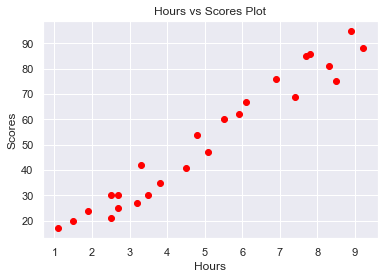

In [21]:
plt.scatter(data.Hours,data.Scores,color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores Plot')
plt.show()

Preparing the data

In [7]:
X=data.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
Y=data.iloc[:,-1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Splitting the data into training and test sets using sklearn library

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Training the algorithm

In [10]:
Linreg=LinearRegression()
Linreg.fit(X_train,Y_train)

LinearRegression()

Finding the equation of Regression line 

In [11]:
line=Linreg.coef_*data['Hours']+Linreg.intercept_

Plotting the Regression line

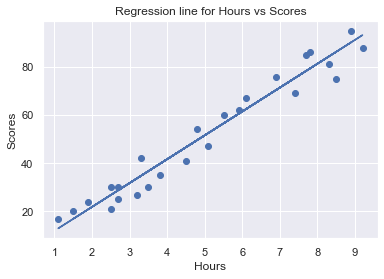

In [12]:
plt.scatter(X,Y)
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression line for Hours vs Scores')
plt.show()

Predicting the outputs for X_test

In [13]:
y_predict=Linreg.predict(X_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Real outputs for X_test

In [14]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

Now comparing the both Real outcome vs Predicted outcome

In [15]:
compare=pd.DataFrame({'real':Y_test,'predicted':y_predict})

In [16]:
compare

,real,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Testing the model with some arbitary data

Predicting the score when the number of hours studied is 9.25 per day

In [17]:
hours=9.25
score_pred=Linreg.predict([[hours]])
print('Number of hours studied: '+ str(hours))
print('Predicted score for '+ str(hours)+ ' hours: ' + str(score_pred))

Number of hours studied: 9.25
Predicted score for 9.25 hours: [93.69173249]


In [18]:
Linreg.score(X_test,Y_test)

0.9454906892105356

Evaluating the model

In [19]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(Y_test,y_predict)
MSE=metrics.mean_squared_error(Y_test,y_predict)
RMSE=np.sqrt(metrics.mean_squared_error(Y_test,y_predict))
print("Mean absolute error: ",MAE)
print("Mean squared error: ",MSE)
print("Root mean squared error: ",RMSE)

Mean absolute error:  4.183859899002975
Mean squared error:  21.5987693072174
Root mean squared error:  4.6474476121003665
